In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('C:/Users/kegel/Iron-Oliver/learningSet.csv', low_memory=False)

In [5]:
data.shape

(95412, 481)

## 
    Check for null values in the numerical columns.
    Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
    Use appropriate EDA technique where ever necessary.


In [6]:
num = data.select_dtypes(np.number)

In [7]:
num.shape

(95412, 407)

In [8]:
cat = data.select_dtypes(np.object)

In [9]:
cat.shape

(95412, 74)

<AxesSubplot:ylabel='Frequency'>

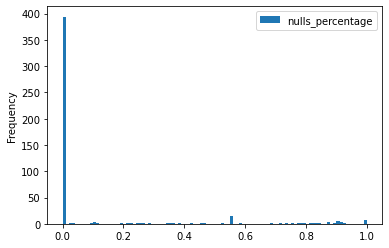

In [18]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df.sort_values(by=['nulls_percentage'], ascending=False).plot(kind='hist', bins=100)

In [19]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage'] > 0.25]['column_name']

In [20]:
cat['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [23]:
cat['GEOCODE2'] = cat['GEOCODE2'].replace(' ','A')

In [24]:
cat['GEOCODE2'].value_counts()

A    34671
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [29]:
num['ADI'].isna().sum()

132

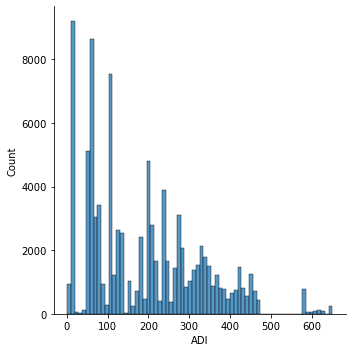

In [27]:
sns.displot(num['ADI'])

In [30]:
num['ADI'] = num['ADI'].replace(np.NaN,np.mean(num['ADI']))

In [31]:
num['ADI'].isna().sum()

0

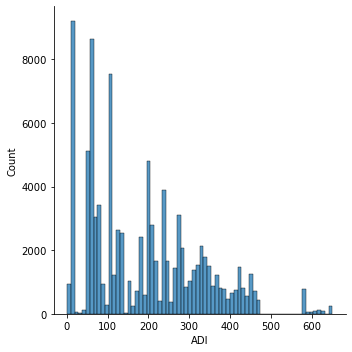

In [32]:
sns.displot(num['ADI'])

In [35]:
num['MSA'].isna().sum()

132

In [39]:
num['MSA'].value_counts().unique()

array([21333,  4606,  4059,  2586,  1685,  1525,  1500,  1472,  1457,
        1414,  1409,  1378,  1360,  1255,  1217,  1195,  1076,  1046,
         993,   929,   894,   824,   817,   791,   790,   771,   745,
         722,   697,   691,   644,   619,   592,   584,   560,   543,
         523,   507,   487,   478,   474,   465,   456,   444,   427,
         415,   395,   389,   387,   382,   363,   354,   353,   341,
         339,   334,   333,   311,   298,   288,   286,   270,   261,
         255,   250,   247,   246,   241,   240,   235,   233,   231,
         227,   226,   223,   222,   213,   211,   208,   206,   203,
         201,   198,   195,   191,   187,   186,   183,   182,   177,
         175,   172,   169,   168,   164,   161,   158,   157,   156,
         153,   152,   151,   150,   146,   144,   143,   140,   139,
         136,   133,   132,   130,   128,   127,   125,   124,   123,
         122,   121,   120,   112,   110,   108,   105,   101,    98,
          97,    96,

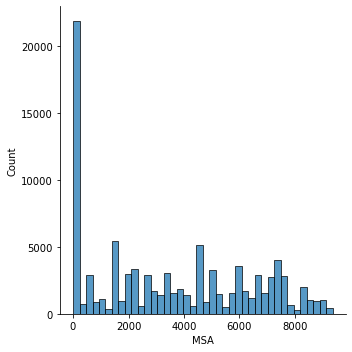

In [36]:
sns.displot(num['MSA'])

In [45]:
num['MSA'] = num['MSA'].replace(np.NaN,1)

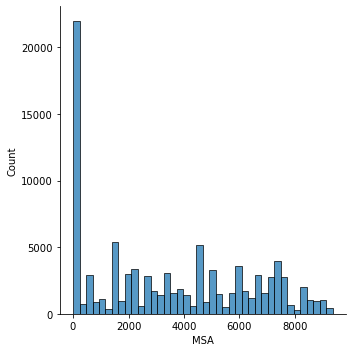

In [46]:
sns.displot(num['MSA'])

In [43]:
num['DMA'].isna().sum()

132

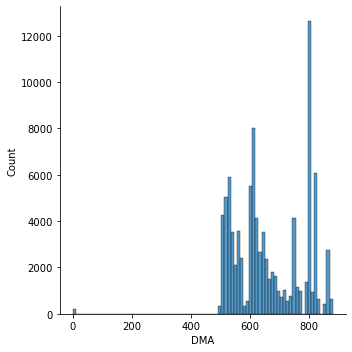

In [44]:
sns.displot(num['DMA'])

In [47]:
num['DMA'] = num['DMA'].replace(np.NaN,np.mean(num['DMA']))

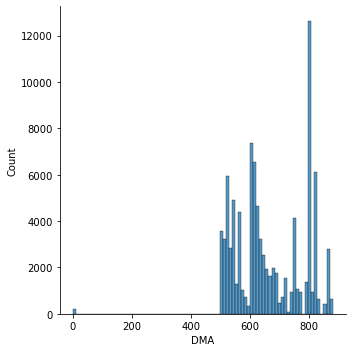

In [48]:
sns.displot(num['DMA'])

In [49]:
num['WEALTH1']

0        NaN
1        9.0
2        1.0
3        4.0
4        2.0
        ... 
95407    NaN
95408    9.0
95409    NaN
95410    NaN
95411    8.0
Name: WEALTH1, Length: 95412, dtype: float64

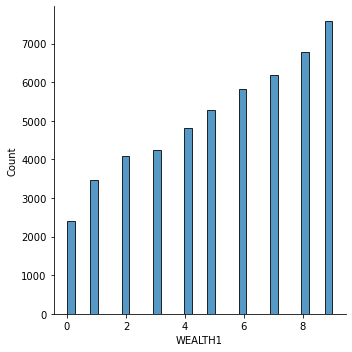

In [50]:
sns.displot(num['WEALTH1'])

In [51]:
data['WEALTH1'].isna().sum()

44732

One approch is to use KNN to predict the WEATLH1 category
